<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
iowa_file = '/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [4]:
iowa.head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [5]:
"""
1. Split Date column to Year, Month and Day columns in order to access each
column easily
2. State Bottle Cost        270955 non-null object
   State Bottle Retail      270955 non-null object
   Sale (Dollars)           270955 non-null object
   change these columns from object data type to float data type, and remove
   $.
"""

'\n1. Split Date column to Year, Month and Day columns in order to access each\ncolumn easily\n2. State Bottle Cost        270955 non-null object\n   State Bottle Retail      270955 non-null object\n   Sale (Dollars)           270955 non-null object\n   change these columns from object data type to float data type, and remove\n   $.\n'

### 3.2 Clean the columns

In [6]:
#split Date column to three columns: Year, Month and Day
iowa['Day'] = [i[1] for i in iowa['Date'].str.split('/')]
iowa['Month'] = [i[0] for i in iowa['Date'].str.split('/')]
iowa['Year'] = [i[2] for i in iowa['Date'].str.split('/')]

In [7]:
#convert three columns to float
iowa['State Bottle Cost'] = [float(i[1:]) for i in iowa['State Bottle Cost']]
iowa['State Bottle Retail'] = [float(i[1:]) for i in iowa['State Bottle Retail']]
iowa['Sale (Dollars)'] = [float(i[1:]) for i in iowa['Sale (Dollars)']]

In [8]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Day,Month,Year
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,04,11,2015
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,02,03,2016
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,11,02,2016
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,03,02,2016
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,18,08,2015


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [9]:
#closed_or_open_in2015 = [store for store in iowa['Store Number'] if store not in iowa[iowa.Year == '2016']['Store Number'].tolist()]

In [10]:
#iowa.groupby(['Store Number','Year']).size().head()

In [11]:
iowa.Year.value_counts()

2015    218594
2016     52361
Name: Year, dtype: int64

In [12]:
pivot_df = pd.pivot_table(iowa, 
               index = ["Store Number",'Year'],
               values = iowa.columns,
               aggfunc = len)

In [13]:
pd.melt(pivot_df.xs('2016', level = 'Year'),
        id_vars = 'Store Number') 

KeyError: 'Store Number'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [14]:
stores_2015 = iowa[iowa.Year == '2015']

In [15]:
stores_2015.groupby('Store Number')['Sale (Dollars)'].sum()

Store Number
2106    146326.22
2113      9310.22
2130    111871.43
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2205     24681.39
2228     17462.07
2233     29553.34
2238     11762.56
2248     67682.06
2285     76927.11
2290     56514.43
2327     10245.14
2353     54000.55
2367      5010.83
2413     90065.02
2445      7189.48
2448     17740.70
2459      7352.33
2460     33731.76
2465     25831.80
2475     10681.07
2478     19840.65
2487     28900.96
2498      2259.67
2500    149121.63
2501    144833.66
          ...    
5180      2239.44
5181       963.04
5182      2612.94
5183       916.80
5185      1077.39
5186       298.86
5187      4239.11
5188      1887.73
5189       604.20
5190      1161.73
5191       303.90
5192        90.00
5193       139.50
5196       682.85
5198      3985.06
5199      2046.22
5201       289.78
5203       928.49
5204       790.44
5205        39.02
5206       500.90
5207      3197.95
5212       504.54
5213       180.

### 5.2 Calculate the profit each store is making in 2015.


In [16]:
iowa['Profit'] = iowa['Sale (Dollars)'] - iowa['State Bottle Cost'] * iowa['Bottles Sold']

In [17]:
store_profit_2015 = iowa[iowa.Year == '2015'].Profit

In [18]:
store_profit_2015.head()

0    27.00
4    43.20
5    39.96
6     9.99
7    15.76
Name: Profit, dtype: float64

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [19]:
iowa['Profit per gallon'] = (iowa.Profit/iowa['Volume Sold (Gallons)'])

In [20]:
iowa[iowa.Year == '2015'].groupby(['County'])['Profit per gallon'].sum().sort_values(axis = 0, ascending = False)

County
Polk             979948.172523
Linn             450094.713966
Scott            323548.915015
Black Hawk       285092.638840
Johnson          261311.412450
Story            170075.281067
Pottawattamie    163261.543165
Woodbury         161866.364454
Dubuque          139449.723838
Cerro Gordo      112963.505708
Des Moines        77684.822248
Muscatine         71862.091400
Clinton           64605.936787
Dickinson         63935.874216
Lee               63852.306741
Wapello           62816.409968
Webster           55552.142780
Marshall          51813.678235
Buena Vista       51136.584575
Dallas            49894.659563
Jasper            48771.908570
Marion            46750.847381
Warren            39813.862388
Bremer            38089.383364
Poweshiek         37369.359859
Boone             34655.949919
Carroll           34274.425332
Clay              32163.196680
Jones             31447.194338
Kossuth           30225.175955
                     ...      
Delaware          11783.198664
S

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [21]:
import seaborn as sns

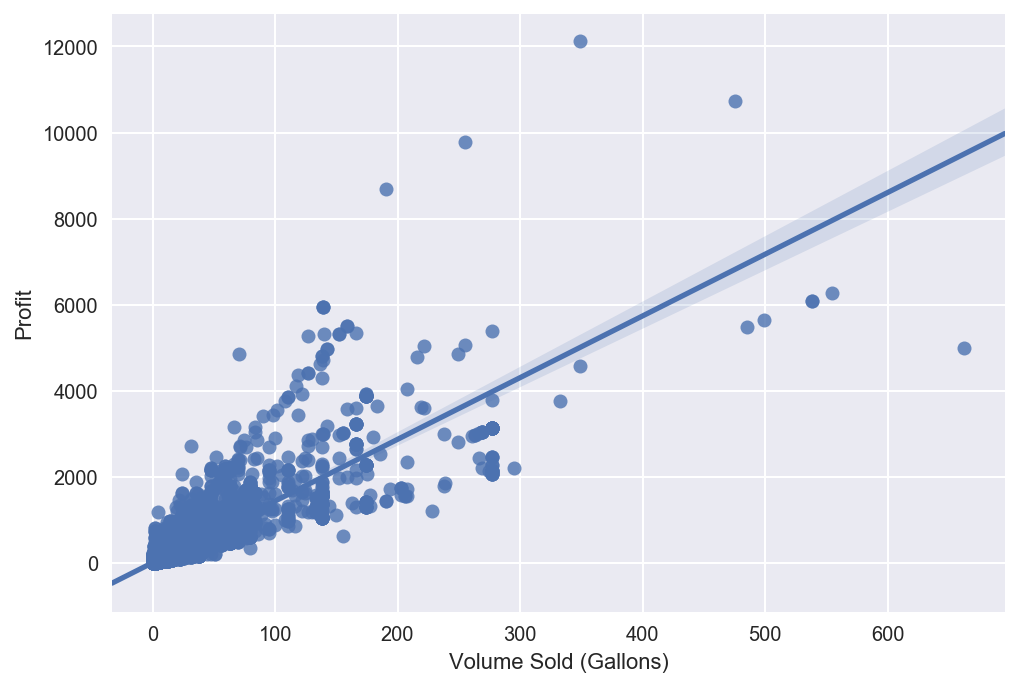

In [22]:
sns.regplot(iowa['Volume Sold (Gallons)'],iowa['Profit'])

In [23]:
iowa[['Volume Sold (Gallons)','Profit']].corr()

,Volume Sold (Gallons),Profit
Volume Sold (Gallons),1.000000,0.851177
Profit,0.851177,1.000000


In [24]:
#these two columns are positively corelated.

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [25]:
iowa['Category Name'].value_counts()

VODKA 80 PROOF                        35373
CANADIAN WHISKIES                     27087
STRAIGHT BOURBON WHISKIES             15342
SPICED RUM                            14631
VODKA FLAVORED                        14001
TEQUILA                               12109
BLENDED WHISKIES                      11547
WHISKEY LIQUEUR                       10902
IMPORTED VODKA                        10668
PUERTO RICO & VIRGIN ISLANDS RUM      10062
FLAVORED RUM                           7282
TENNESSEE WHISKIES                     7081
AMERICAN COCKTAILS                     6929
AMERICAN GRAPE BRANDIES                6589
AMERICAN DRY GINS                      6559
IMPORTED VODKA - MISC                  6506
MISC. IMPORTED CORDIALS & LIQUEURS     6299
CREAM LIQUEURS                         6284
SCOTCH WHISKIES                        5375
IMPORTED GRAPE BRANDIES                4614
IMPORTED SCHNAPPS                      4249
MISC. AMERICAN CORDIALS & LIQUEURS     3394
100 PROOF VODKA                 

In [26]:
#remove null
iowa = iowa.dropna()

In [27]:
#after observation, liquors under the same general columns have the same first number in category column
#create another column named General Category to store the data
iowa['General Category'] = [int(str(i)[:3]) for i in iowa.Category]


In [39]:
iowa.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Day,Month,Year,Profit,Profit per gallon,General Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,12,81.00,9.0,2.38,04,11,2015,27.00,11.344538,105
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,2,41.26,1.5,0.40,02,03,2016,13.76,34.400000,101
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,24,453.36,24.0,6.34,11,02,2016,151.20,23.848580,101
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,6,85.50,10.5,2.77,03,02,2016,28.50,10.288809,107
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,12,129.60,21.0,5.55,18,08,2015,43.20,7.783784,103


### 5.7 Do relationships exist between the broader liquor type and profit?

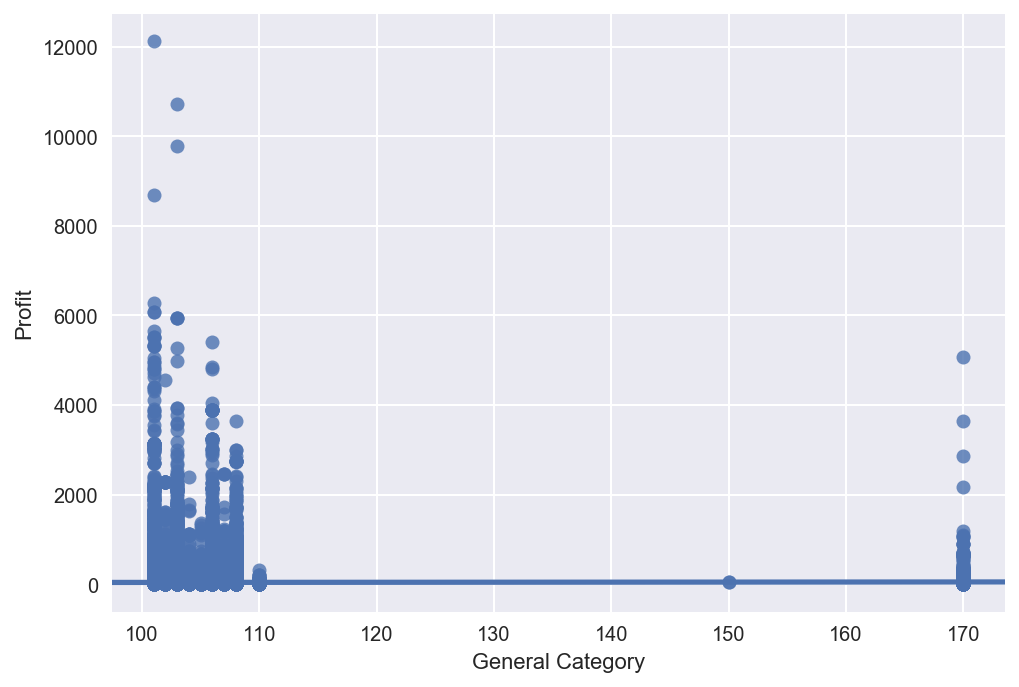

In [38]:
sns.regplot(iowa['General Category'],iowa['Profit'])

In [30]:
iowa[['General Category','Profit']].corr()

,General Category,Profit
General Category,1.000000,0.005553
Profit,0.005553,1.000000


In [31]:
#there is no relationship between these two columns

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [32]:
iowa[['Vendor Number','Profit']].corr()

,Vendor Number,Profit
Vendor Number,1.000000,-0.012795
Profit,-0.012795,1.000000


In [ ]:
#no relationship

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [33]:
#mask1 = (iowa.Month == 'January' or iowa.Month == 'February' or iowa.Month == 'March')
Q1_df = iowa[iowa.Month.isin(['01','02','03'])]

In [34]:
Q1_2015 = Q1_df[Q1_df.Year == '2015']
Q1_2016 = Q1_df[Q1_df.Year == '2016']

 ### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [35]:
join_df = Q1_2015.merge(Q1_2016, on = 'Store Number' )

In [36]:
join_df['sales growth'] = join_df['Sale (Dollars)_y'] - join_df['Sale (Dollars)_x']

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [43]:
join_df.groupby('County_x').sum().sort_values('sales growth',ascending = False)
#Lee, Dallas and Pottawattamie are the top three selling well counties.

,Store Number,County Number_x,Category_x,Vendor Number_x,Item Number_x,Bottle Volume (ml)_x,State Bottle Cost_x,State Bottle Retail_x,Bottles Sold_x,Sale (Dollars)_x,...,State Bottle Cost_y,State Bottle Retail_y,Bottles Sold_y,Sale (Dollars)_y,Volume Sold (Liters)_y,Volume Sold (Gallons)_y,Profit_y,Profit per gallon_y,General Category_y,sales growth
County_x,,,,,,,,,,,,,,,,,,,,,
Johnson,1026993570,18546632.0,3.720132e+11,91608268,18917714354,323224900,3.648605e+06,5.479454e+06,4067491,5.693770e+07,...,3.799130e+06,5.700723e+06,4882469,6.759024e+07,4.467673e+06,1.180313e+06,2.254574e+07,8.926659e+06,37029637,1.065255e+07
Lee,133384263,2741256.0,5.107279e+10,12506919,2392658483,45461575,5.117760e+05,7.685109e+05,475547,6.857248e+06,...,5.460360e+05,8.192926e+05,698777,1.119825e+07,6.905903e+05,1.824447e+05,3.734224e+06,1.152739e+06,5108527,4.341006e+06
Dallas,153292054,1352475.0,5.650739e+10,13463592,2594098252,50989275,5.446683e+05,8.187570e+05,420918,6.479168e+06,...,5.739355e+05,8.614465e+05,625628,9.481127e+06,5.563100e+05,1.469640e+05,3.165270e+06,1.351292e+06,5648470,3.001959e+06
Dubuque,547117789,5397534.0,1.815944e+11,44635286,8172940849,167953300,1.765575e+06,2.651619e+06,1627835,2.234763e+07,...,1.888357e+06,2.833863e+06,1778388,2.454319e+07,1.679279e+06,4.436200e+05,8.189168e+06,4.146806e+06,18122850,2.195555e+06
Woodbury,493228728,15430566.0,1.661764e+11,41378243,7656300668,144034150,1.617909e+06,2.429717e+06,1564865,2.187218e+07,...,1.647765e+06,2.472794e+06,1613031,2.389140e+07,1.573026e+06,4.155901e+05,7.981357e+06,3.820428e+06,16594081,2.019223e+06
Crawford,40433355,339840.0,1.481346e+10,3506091,667033339,12912250,1.427087e+05,2.142583e+05,97544,1.359477e+06,...,1.432980e+05,2.150627e+05,237645,3.299675e+06,3.231776e+05,8.536908e+04,1.131515e+06,3.334996e+05,1473096,1.940198e+06
Clinton,223074135,1736983.0,7.876944e+10,18281209,3502122905,68361825,6.976620e+05,1.047904e+06,722000,8.741967e+06,...,7.145612e+05,1.072261e+06,791011,9.756033e+06,7.329684e+05,1.936272e+05,3.254241e+06,1.681845e+06,7860636,1.014066e+06
Cedar,41544339,149520.0,9.750999e+09,2360792,410192808,8389100,6.893141e+04,1.037902e+05,48782,4.493055e+05,...,7.724704e+04,1.159954e+05,78065,1.057022e+06,1.055204e+05,2.787353e+04,3.634023e+05,1.859521e+05,974815,6.077169e+05
Sioux,38536704,971712.0,1.212153e+10,2952644,543648074,11402500,1.129545e+05,1.695747e+05,79688,1.131710e+06,...,1.154992e+05,1.733816e+05,115850,1.716916e+06,1.524247e+05,4.026161e+04,5.806580e+05,2.300562e+05,1207846,5.852064e+05


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [41]:
iowa.loc[iowa['Profit per gallon'] == iowa['Profit per gallon'].max()]['Category Name']

196351    SCOTCH WHISKIES
Name: Category Name, dtype: object

In [ ]:
# SCOTCH WHISKIES has the maximize profit

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [ ]:
"""
hypotheses:
1.people buy more beer in the summer
2.people buy more whiskies in the winter
3.people buy more liquor begining of the month
"""

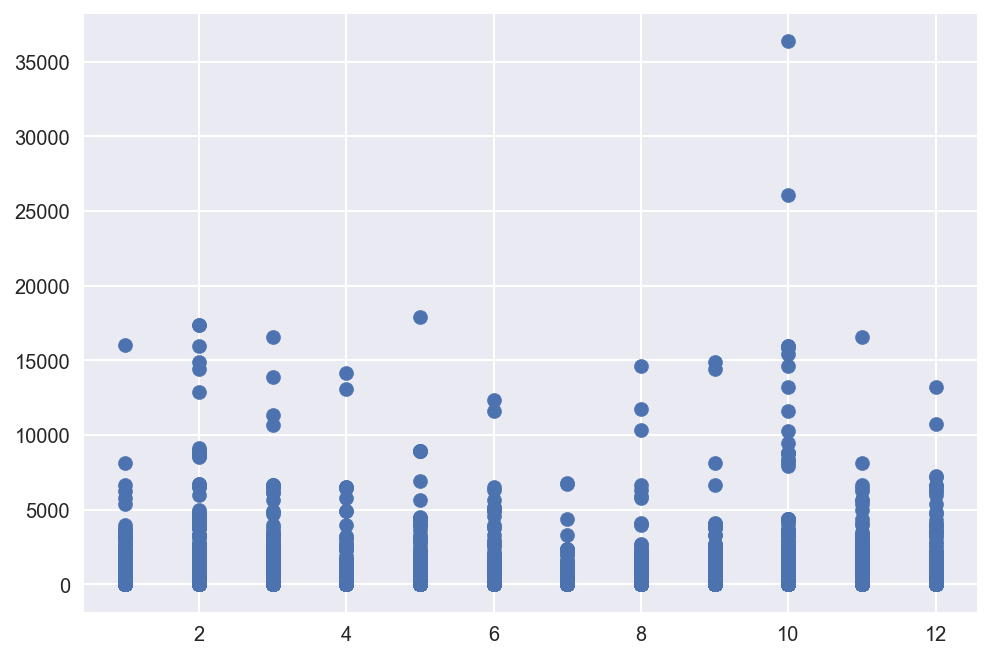

In [42]:
plt.scatter(iowa[iowa['General Category'] == 101].Month,iowa[iowa['General Category'] == 101]['Sale (Dollars)'])

In [ ]:
#people buy more whiskies in october

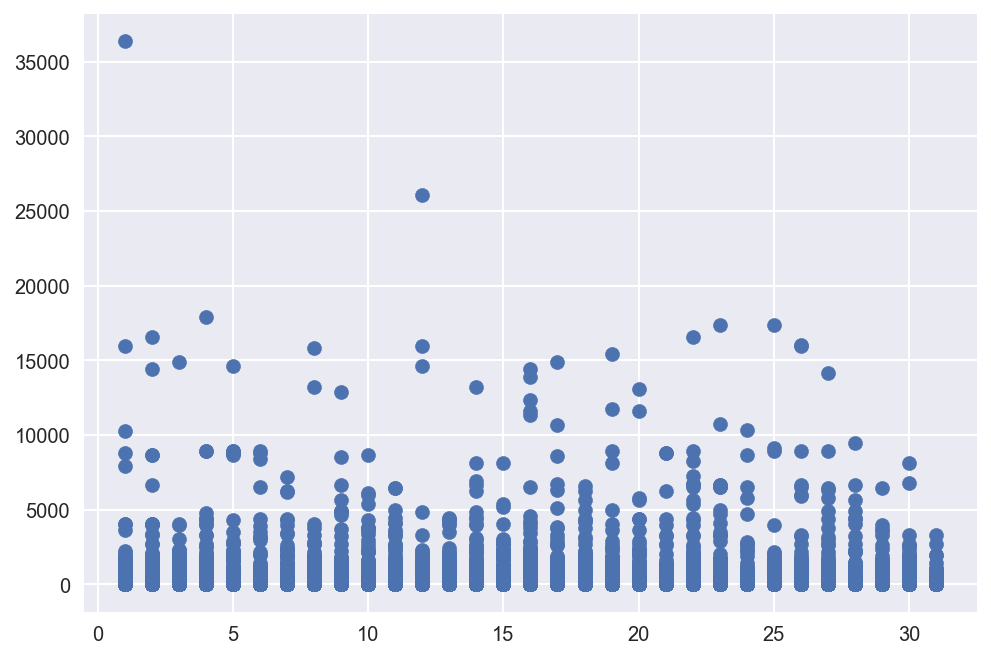

In [44]:
plt.scatter(iowa[iowa['General Category'] == 101].Day,iowa[iowa['General Category'] == 101]['Sale (Dollars)'])

In [ ]:
#almost average, no date preference

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?